오버워치 토론장 
1. 미리보기가 있지만 게시글 내부로 들어가면 수많은 댓글이 있음.
2. 댓글 내부에는 인용이라는 기능이 있어서 인용 부분을 없애주어야함.
3. 댓글을 달경우 게시글이 끌어올려짐.
4. 게시글 내부에 페이지가 존재하는데, 그 페이지는 게시글마다 다름.
5. 홈페이지 업데이트 속도가 굉장히 느림.
--> 모든 게시글의 링크를 모은 뒤, 혹시모를 중복제거.
--> 그 후 다음 버튼을 없어질 때까지 눌러줌.
--> 인용부분 제거.

In [2]:
import requests
import lxml.html

In [66]:
page=1
url='https://us.battle.net/forums/en/overwatch/22813879/?page={}'.format(page)

In [67]:
res=requests.get(url)

In [68]:
root=lxml.html.fromstring(res.text)

In [69]:
link=root.cssselect('.ForumTopic')

In [74]:
'https://us.battle.net'+root.cssselect('#forum-topics > div.Forum-ForumTopicList > a:nth-child(2)')[0].attrib['href']

'https://us.battle.net/forums/en/overwatch/topic/20759189782'

In [70]:
res2=requests.get('https://us.battle.net'+root.cssselect('#forum-topics > div.Forum-ForumTopicList > a:nth-child(2)')[0].attrib['href'])

In [71]:
root2=lxml.html.fromstring(res2.text)

In [75]:
cmt=root2.cssselect('div.TopicPost-bodyContent')[3];cmt

<Element div at 0x229c9593cc8>

In [77]:
cmt.text_content()

"I've got an idea about how they could rework scatter arrow.There's a button on the keyboard near the enter key (above the arrow keys) that says 'delete' on it. I think if Blizzard were to push it, Scatter Arrow would instantly become balanced and fairNow, I rarely play hanzo, the class style is known as a “anti Inflator/escapist” the Scatter was primarily built for stopping any sort of low health or incoming in tight spots. Which is the only real reason I want to play hanzo, because shooting a bow is fun and so is getting those tighter corners.But since Some people (youtubers) expose this, everyone follows."

In [92]:
for script in cmt.cssselect('blockquote'):
    cmt.remove(script)

In [97]:
script

<Element blockquote at 0x229c74721d8>

In [88]:
cmt.remove()

TypeError: remove() takes no keyword arguments

In [85]:
cmt.cssselect('blockquote')

[<Element blockquote at 0x229c74721d8>]

In [90]:
a=cmt.cssselect('blockquote');a

[<Element blockquote at 0x229c74721d8>]

In [100]:
if cmt.cssselect('blockquote')!=[]:
    cmt.remove(cmt.cssselect('blockquote')[0])

In [101]:
cmt.text_content()

'Now, I rarely play hanzo, the class style is known as a “anti Inflator/escapist” the Scatter was primarily built for stopping any sort of low health or incoming in tight spots. Which is the only real reason I want to play hanzo, because shooting a bow is fun and so is getting those tighter corners.But since Some people (youtubers) expose this, everyone follows.'

In [148]:
link=[]
for page in range(1,10):
    url='https://us.battle.net/forums/en/overwatch/22813879/?page={}'.format(page)
    res=requests.get(url)
    root=lxml.html.fromstring(res.text)
    for elm in root.cssselect('.ForumTopic'):
        link.append('https://us.battle.net'+elm.attrib['href'])


In [153]:
len(link)

448

1. 먼저 위에서 게시글에 대한 링크를 모은다.
2. 게시물 한 개씩 접근한다.
3. 접근해서 페이지에 있는 댓글부분을 모아준다.
4. 각 댓글에 대해서 댓글 내용을 뽑아내기 이전에, 인용부분을 제거하고 뽑아서 저장한다.

In [129]:
link[6:7]

['https://us.battle.net/forums/en/overwatch/topic/20759219984']

In [128]:
comments=[]
for url in link[4:] :
    res2=requests.get(url)
    root2=lxml.html.fromstring(res2.text)
    cmt=root2.cssselect('div.TopicPost-bodyContent')
    for elm in cmt:
        if elm.cssselect('.quote-public')!=[]:
            elm.remove(elm.cssselect('.quote-public')[0])
        if elm.cssselect('blockquote')!=[]:
            elm.remove(elm.cssselect('blockquote')[0])
        comments.append(elm.text_content())

각 게시글 내부에서 페이지를 넘기면서 댓글을 긁어 모으는 루프 만들기
끝을 모르기 때문에 while 사용하기.

In [265]:
link[40]

'https://us.battle.net/forums/en/overwatch/topic/20758447090'

In [352]:
res3=requests.get('https://us.battle.net/forums/en/overwatch/topic/20758447090?page=23')
root3=lxml.html.fromstring(res3.text)
comments=[]
cmt=root3.cssselect('.TopicPost-bodyContent')

In [356]:
comments2=[]
for elm in cmt:
    if elm.cssselect('.quote-public')!=[]:
        elm.remove(elm.cssselect('.quote-public')[0])
    if elm.cssselect('blockquote')!=[]:
        elm.remove(elm.cssselect('blockquote')[0])
    comments2.append(elm.text_content())

In [357]:
comments2

['Bumping this thread to keep it alive. Also doing so as a new patch went live without anything in the OP for us.',
 '',
 '',
 "I thought cost was a per patch basis? Couldn't the console qol changes be included with another update that has hero changes or more content?",
 "If I remember correctly, sony and microsofr both charge Blizz like 40k dollars for every update no matter the size. Thats why the bug fixes and everything comes 'later' all together im big updates.But I wouldnt mind paying another extra 20bucks for all this ideas we have. If only they would DO IT.Its been 1 year and a half and console is still dead silenced. Im gettinf angry, at least a 'we are working on it' but noooo, nothing, NADA.",
 "By choose the region do you mean the servers? Because I'm all for that. Not sure why (as a European) I can't join the NA servers if I want",
 '',
 '',
 '',
 'Oh sorry ^^;',
 "[Bookmarked] I'm bumping this everyday. Its crazy for this not to have been seen.",
 'ability to recommend a

In [ ]:
comments=[]
for url in link[4:] :
    res2=requests.get(url)
    root2=lxml.html.fromstring(res2.text)
    cmt=root2.cssselect('div.TopicPost-bodyContent')
    for elm in cmt:
        comments.append(elm.xpath('text()')[0])

In [354]:
comments

['Bumping this thread to keep it alive. Also doing so as a new patch went live without anything in the OP for us.',
 " It isn't impossible at all, but it will probably not be good, or worth it, they should focus on the actual game first.",
 ' I forgot that it costs more on console, more reasons to think Blizzard hates console, and only put it there for money.',
 "I thought cost was a per patch basis? Couldn't the console qol changes be included with another update that has hero changes or more content?",
 "If I remember correctly, sony and microsofr both charge Blizz like 40k dollars for every update no matter the size. Thats why the bug fixes and everything comes 'later' all together im big updates.",
 "By choose the region do you mean the servers? Because I'm all for that. Not sure why (as a European) I can't join the NA servers if I want",
 ' We were talking about the cost of buying overwatch, not how much it costs Blizzard.',
 " Yes, that's what it means.",
 " They are already very

In [4]:
res3=requests.get('https://us.battle.net/forums/en/overwatch/topic/20758447090?page=1')
root3=lxml.html.fromstring(res3.text)
comments=[]
cmt=root3.cssselect('div.TopicPost-bodyContent')
for elm in cmt:
    comments.append(elm.xpath('text()')[0])
print(comments[0])
while True:
    try:
        res4=requests.get('https://us.battle.net/forums/en/overwatch/topic/20758447090'+
                          root3.cssselect('div.Topic-pagination--header > a.Pagination-button.Pagination-button--next')[0].attrib['href'])
        print(root3.cssselect('div.Topic-pagination--header > a.Pagination-button.Pagination-button--next')[0].attrib['href'])
        root3=lxml.html.fromstring(res4.text)
        cmt=root3.cssselect('div.TopicPost-bodyContent')
        for elm in cmt:
            comments.append(elm.xpath('text()')[0])
    except KeyError:
        print('탈출')
        break

Ok, thread is capped, here is the link to "Simple things that aren't on console, but should be. #2" 
?page=2


IndexError: list index out of range

In [20]:
res3=requests.get('https://us.battle.net/forums/en/overwatch/topic/20758447090?page=1')
root3=lxml.html.fromstring(res3.text)
comments=[]
cmt=root3.cssselect('div.TopicPost-bodyContent')
for elm in cmt:
    try:
        comments.append(elm.xpath('text()'))
    except IndexError:
        continue
print(comments[0])

['Ok, thread is capped, here is the link to "Simple things that aren\'t on console, but should be. #2" ', 'Feel free to add to the list, I will edit in good suggestions. ', 'These suggestions are meant to be like things that PC already has and are simple to put in, or something like making the console version work better with the controller.', "If you want this post to succeed, do anything you can to get Blizzard's attention and get them to respond. ", '-Bind controls to multiple buttons', '-Bind things like "group up" and "i need healing" to a button', '-The ability to say attack/defend the objective', '-A working linear ramp dead zone (XIM4MnK)', '-Bind a control to activate from pressing multiple buttons at a time (caracc)', '-FOV slider (BaronVonGoon)', '-Push to talk option (Lance)', '-Target callouts to a teammate like ult charge and group up (Lance)', '-In-game text chat (LilyStryfe)', '-Seperate hero balancing from PC (YamiHuss)', '-Hide menu/HUD option (HunterGambit)', '-Need 

In [27]:
''.join(comments[0])

'Ok, thread is capped, here is the link to "Simple things that aren\'t on console, but should be. #2" Feel free to add to the list, I will edit in good suggestions. These suggestions are meant to be like things that PC already has and are simple to put in, or something like making the console version work better with the controller.If you want this post to succeed, do anything you can to get Blizzard\'s attention and get them to respond. -Bind controls to multiple buttons-Bind things like "group up" and "i need healing" to a button-The ability to say attack/defend the objective-A working linear ramp dead zone (XIM4MnK)-Bind a control to activate from pressing multiple buttons at a time (caracc)-FOV slider (BaronVonGoon)-Push to talk option (Lance)-Target callouts to a teammate like ult charge and group up (Lance)-In-game text chat (LilyStryfe)-Seperate hero balancing from PC (YamiHuss)-Hide menu/HUD option (HunterGambit)-Need permission to join group (LilyStryfe)-Sliders for things lik

In [17]:
import numpy

In [18]:
comments = numpy.squeeze(numpy.asarray(comments))

In [22]:
comments

'Ok, thread is capped, here is the link to "Simple things that aren\'t on console, but should be. #2" '

In [29]:
res3=requests.get('https://us.battle.net/forums/en/overwatch/topic/20758447090?page=1')
root3=lxml.html.fromstring(res3.text)
comments=[]
cmt=root3.cssselect('div.TopicPost-bodyContent')
for elm in cmt:
    try:
        comments.append(elm.xpath('text()'))
    except IndexError:
        continue
print(comments[0])
while True:
    try:
        res4=requests.get('https://us.battle.net/forums/en/overwatch/topic/20758447090'+
                          root3.cssselect('div.Topic-pagination--header > a.Pagination-button.Pagination-button--next')[0].attrib['href'])
        print(root3.cssselect('div.Topic-pagination--header > a.Pagination-button.Pagination-button--next')[0].attrib['href'])
        root3=lxml.html.fromstring(res4.text)
        cmt=root3.cssselect('div.TopicPost-bodyContent')
        for elm in cmt:
            try:
                comments.append(elm.xpath('text()'))
            except IndexError:
                continue
    except KeyError:
        print('탈출')
        break

['Ok, thread is capped, here is the link to "Simple things that aren\'t on console, but should be. #2" ', 'Feel free to add to the list, I will edit in good suggestions. ', 'These suggestions are meant to be like things that PC already has and are simple to put in, or something like making the console version work better with the controller.', "If you want this post to succeed, do anything you can to get Blizzard's attention and get them to respond. ", '-Bind controls to multiple buttons', '-Bind things like "group up" and "i need healing" to a button', '-The ability to say attack/defend the objective', '-A working linear ramp dead zone (XIM4MnK)', '-Bind a control to activate from pressing multiple buttons at a time (caracc)', '-FOV slider (BaronVonGoon)', '-Push to talk option (Lance)', '-Target callouts to a teammate like ult charge and group up (Lance)', '-In-game text chat (LilyStryfe)', '-Seperate hero balancing from PC (YamiHuss)', '-Hide menu/HUD option (HunterGambit)', '-Need 

In [6]:
comments

['Ok, thread is capped, here is the link to "Simple things that aren\'t on console, but should be. #2" ',
 'A working linear ramp dead zone.',
 "I'm going to say something that sounds dumb on paper here so bear with me:  If Kerbal Space Program can get all of it's controls working off an Xbox One controller, so can Overwatch.  ",
 " I don't think it sounds dumb, sounds like a good idea. Edit: forgot to add, added it a day later.",
 ' Added',
 'FOV slider. Blizz QA testers have you tried playing Tracer on console? ',
 ' Added',
 'Bump',
 '• Targeting ultimate charges to other teammates',
 'Upvoted',
 'A push to talk button. To talk only when necessary and not hear other players constant background noises.',
 'In-game text chat. Really helps when people refuse to join team voice chat for some reason.',
 'A better aiming system in general :/',
 ' I do agree, but this list is meant to be for things for the console version, those should be on both PC and console. (Not talking about Push to 

이제 각 게시글의 모든 내용을 긁었으니 이것을 모든 게시글에 적용해보고자 한다.

In [4]:
import requests
import lxml.html

In [7]:
link=[]
for page in range(1,3):
    url='https://kr.battle.net/forums/ko/overwatch/5018707/?page={}'.format(page)
    res=requests.get(url)
    root=lxml.html.fromstring(res.text)
    for elm in root.cssselect('.ForumTopic'):
        link.append('https://kr.battle.net'+elm.attrib['href'])
print(len(link))
comments=[]
for url in link[8:]:
    print(url)
    res2=requests.get(url)
    root2=lxml.html.fromstring(res2.text)
    cmt=root2.cssselect('div.TopicPost-bodyContent')
    for elm in cmt:
        try:
            comments.append(elm.xpath('text()'))
        except IndexError:
            continue
    print(comments[-1])
    while True:
        try:
            res3=requests.get(url+
                              root2.cssselect('div.Topic-pagination--header > a.Pagination-button.Pagination-button--next')[0].attrib['href'])
            print(root2.cssselect('div.Topic-pagination--header > a.Pagination-button.Pagination-button--next')[0].attrib['href'])
            root2=lxml.html.fromstring(res3.text)
            cmt=root2.cssselect('div.TopicPost-bodyContent')
            for elm in cmt:
                try:
                    comments.append(elm.xpath('text()'))
                except IndexError:
                    continue
            print(comments[-1])
        except IndexError:
            print('IndexError')
            break
        except KeyError:
            print('KeyError')
            break
    

100
https://kr.battle.net/forums/ko/overwatch/topic/4563386631
['저희는 게임 내 부정 행위를 항상 심각한 문제로 여기고 있으며, 이는 오버워치에도 동일하게 적용됩니다. 블리자드는 공정한 플레이를 강조하는 “Play nice, Play fair.”를 회사의 핵심 가치 중 하나로 여기며 게임 제작 과정 그리고 출시 이후 게임을 지원해 나가는 과정에서 이를 항상 마음 속에 새기고 있습니다. ', '이러한 원칙이 오버워치에서 의미하는 바는, 플레이어가 핵, 봇, 또는 부당한 이득을 취하도록 해주는 외부 소프트웨어 등을 사용하거나 부정 행위를 한 것이 확인될 경우, 해당 플레이어의 계정은 영구 정지된다는 것입니다. 부정 행위는 모든 블리자드 게임의 근간인 공정한 플레이 정신을 저해하며 다른 플레이어들의 재미와 즐거움에도 악영향을 끼칩니다. 부정 행위나 허용되지 않은 프로그램 사용자에 대한 계정 제재가 진행된 내용을 공개적으로 발표하지는 않겠지만, 저희는 오버워치에서 일어나는 부정 행위를 지속적으로 확인하고, 게임의 무결성을 보존하기 위해 필요한 조치를 계속해서 취할 것입니다. ', '블리자드가 지금까지 가져온 기조를 다시 강조하는 것이지만, 이는 매우 중요한 가치이며 이렇게 여러분께 최고의 게임 플레이 경험을 제공하겠다고 다짐하며 저희 스스로 다시 한번 각오를 다지는 것이기도 합니다. 저희에게는 멋진 게임을 만드는 것뿐만 아니라 게임과 게임 커뮤니티를 수년간 꾸준히 지원하는 것 역시 중요합니다. 5월 24일 오버워치 정식 출시는 시작일 뿐이며, 저희는 앞으로도 새로운 게임 콘텐츠를 개발하는 것과 더불어 모든 플레이어에게 공정한 게임 환경을 제공하기 위해 최선을 다할 것입니다. ', '그리고 이를 위해서는 여러분의 도움이 필요합니다!', '만약 어떤 플레이어가 부정 행위를 했다고 생각되거나 오버워치의 핵, 봇, 또는 허용되지 않은 외부 소프트웨어와 관련된 정보를 알고 계시다면 이메일(', ') 또는 ', '을 통해 세부

['엥 그럼 저 젠야타 14시간에 헤드 12%인데 핵이게요?']
IndexError
https://kr.battle.net/forums/ko/overwatch/topic/4566406672
['안녕하십니까? 저는 오버워치 플레이중 버그를 겪은 저의 후기를 알려 주려고 문의를 남겼습니다.저는 오버워치 플레이도중 친구들과 함께 그룹에 나가진 어이없는 버그가 걸렸습니다.친구도 없어져서 다시 추가해도 사라지고 그룹에 초대받거나 들어가도 나가지기 일쑤였습니다.이 버그를 빨리 고쳐서 친구들과 재밌는 게임을 하고 싶습니다.문의 주세요']
IndexError
https://kr.battle.net/forums/ko/overwatch/topic/4566396693
['20!@# 5월 16일 12시 8분']
IndexError
https://kr.battle.net/forums/ko/overwatch/topic/4566396687
['생각해보니 그것도 좋을 것 같네요. 페이크로 던지는 척하면서 적 기술도 뺄 수 있고.']
IndexError
https://kr.battle.net/forums/ko/overwatch/topic/4566396688
['블리자드가 지금의 라이엇처럼 정신만 차린다면야..;;']
IndexError
https://kr.battle.net/forums/ko/overwatch/topic/4566416669
['일 존나게못하는데', '2시즌 3시즌 핵 방치 지금도 간간히 핵보임', '유저 비매너 방치', '닷지버그 한동안 방치', '밸런스 개말아먹음', '개엿같은 상자깡 이벤트', '오버워치 리그 후빨중', '대리 지금도 방치(오버워치 리그 - 사도, OGE)', '친목질 냄새도 나기 시작', '상대팀엔 거의 대리유저 우리팀은 힐딱이가 뜬금없이 딜러잡아서 말아먹거나 3딜 4딜나와서 게임터짐', '서비스종료 ㄱㄱ']
IndexError
https://kr.battle.net/forums/ko/overwatch/topic/4566426682
['왜냐하면, 블쟈놈

KeyboardInterrupt: 

In [ ]:
comments

In [ ]:
link=[]
for page in range(1,2):
    url='https://us.battle.net/forums/en/overwatch/22813879/?page={}'.format(page)
    res=requests.get(url)
    root=lxml.html.fromstring(res.text)
    for elm in root.cssselect('.ForumTopic'):
        link.append('https://us.battle.net'+elm.attrib['href'])
print(len(link))
comments=[]
for url in link[4:]:
    print(url)
    res2=requests.get(url)
    root2=lxml.html.fromstring(res2.text)
    cmt=root2.cssselect('div.TopicPost-bodyContent')
    for elm in cmt:
        try:
            comments.append(elm.xpath('text()'))
        except IndexError:
            continue
    print(comments[-1])
    while True:
        try:
            res3=requests.get(url+
                              root2.cssselect('div.Topic-pagination--header > a.Pagination-button.Pagination-button--next')[0].attrib['href'])
            print(root2.cssselect('div.Topic-pagination--header > a.Pagination-button.Pagination-button--next')[0].attrib['href'])
            root2=lxml.html.fromstring(res3.text)
            cmt=root2.cssselect('div.TopicPost-bodyContent')
            for elm in cmt:
                try:
                    comments.append(elm.xpath('text()'))
                except IndexError:
                    continue
            print(comments[-1])
        except IndexError:
            print('IndexError')
            break
        except KeyError:
            print('KeyError')
            break
    

48
https://us.battle.net/forums/en/overwatch/topic/20761046611
['What impact this has on Moira? Fade jump tricks for example? ', 'Sometimes I fade backwards and ended up killing myself for going on an incline and off a cliff. :(']
?page=2
["You still lose momentum though. No mention of lucio at all?Lucio's speed is significantly affected by this changes. It feels easier to change direction while wall skimming. (i.e Look at the direction and press W) But it nerfs bhopping. Even after the scroll wheel changes you could Bhop if you timed the jumps properly. But now, it looks like you completely lose the speed boost after 1/2 bhops."]
?page=3
["The most noticeable difference I have encountered so far is tracers blink sometimes has a very small rubberband effect. I don't know if this is related but people have mentioned screen jitter and I'm thinking this is something similar."]
?page=4
["The bot jitter is new too. I do aim drills with AI bots in a custom game few times a week. I noticed th

?page=2
["Zarya can't kill ANYONE unless she's charge lmao. And D.Va's mobility is on a shorter cooldown than Moira's while also having higher DPS and practically 750 HP + some of it being armor which Moira does poorly against."]
KeyError
https://us.battle.net/forums/en/overwatch/topic/20761926673
['The solution is "Use Range" and don\'t go in blind into chokes and hallways if you know they have a grenade launcher character.']
IndexError
https://us.battle.net/forums/en/overwatch/topic/20762006721
['Any bets on what next month will be? Last month was:', 'Buff: Mercy', 'Nerf: Mercy']
IndexError
https://us.battle.net/forums/en/overwatch/topic/20761866679
["It's bad enough there is such a small selection to choose from for Arcade, but now TWO of the FIVE choices are Capture the Flag. Two of the other choices are single player options (Deathmatch and 1v1) and then Mystery heroes. If I want to play with a friend in arcade AND pick my hero I'm obligated to play CTF. Feelsbad."]
IndexError
htt

?page=27
["I really do like the idea of launching her turrets as a projectile that latch onto a wall they hit. She wouldn't have to be away from her team as often.", "BUT, more than anything, it gives her a feasible way to fight Pharah (if they shoot mid-flight). I don't know of any other matchup in the game that's so one-sided than Sym v Pharah. Pharah counters Mei, Junkrat, Tracer, etc but even they have ways to be able to hold their own against her. But Sym? 9/10 times the Pharah wins. I understand having counters in the game, that's what the game is about. But there aren't HARD counters outside of Pharah v Sym. All characters who have a counter can have ways to fend for themselves. But Sym can do nothing outside of randomly getting lucky with a stray orb or surprising the Pharah in close corridors.", "I'm sorry, that's just some random mini-rant from me.", 'Anyway, I do like the "launchable turrets" idea.']
?page=28
['Honestly I just want blizzard to try a couple new abilities in i

?page=48
['i agree']
?page=49
['Yall know what i do in a game as symm? PROTEC THE HEALERS. ', 'If that Tracer / Genji / Sombra trying to take my healers away, STEP OVER MY DEAD BODY!!!!!!', '.', '.', '.', '.', '.', '.', '.', 'Except for the Pharah tho i cant do sht to her. Maybe a Shield gen to prevent 2 shots KO from her.']
?page=50
['Blizzard has to know by this point the community thinks that Symmetra is inflexible, is easily countered by more well rounded characters, and we want her to change.  I wonder what they are doing behind the scenes. ', 'Do they have plans?', 'Is she on the back burner because of something more important?', "Do they think she's in a good spot, for some reason? ", 'What is it?', 'With how big this thread is getting, Blizzard should say something sooner than later.']
?page=51
['Symmetra getting stuck onto friendly Mei walls is actually pretty hindering when the feces hit the fan. It can get you killed.']
?page=52
["Well, It's blind truth. Although having an o

In [2]:
len(comments)

NameError: name 'comments' is not defined

In [ ]:
comments2=comments

In [453]:
len(comments);85884

85884

### 리스트 차원 줄여주기

In [21]:
for i in range(0,len(comments)):
    comments[i]=''.join(comments[i])

In [29]:
comments

['저희는 게임 내 부정 행위를 항상 심각한 문제로 여기고 있으며, 이는 오버워치에도 동일하게 적용됩니다. 블리자드는 공정한 플레이를 강조하는 “Play nice, Play fair.”를 회사의 핵심 가치 중 하나로 여기며 게임 제작 과정 그리고 출시 이후 게임을 지원해 나가는 과정에서 이를 항상 마음 속에 새기고 있습니다. 이러한 원칙이 오버워치에서 의미하는 바는, 플레이어가 핵, 봇, 또는 부당한 이득을 취하도록 해주는 외부 소프트웨어 등을 사용하거나 부정 행위를 한 것이 확인될 경우, 해당 플레이어의 계정은 영구 정지된다는 것입니다. 부정 행위는 모든 블리자드 게임의 근간인 공정한 플레이 정신을 저해하며 다른 플레이어들의 재미와 즐거움에도 악영향을 끼칩니다. 부정 행위나 허용되지 않은 프로그램 사용자에 대한 계정 제재가 진행된 내용을 공개적으로 발표하지는 않겠지만, 저희는 오버워치에서 일어나는 부정 행위를 지속적으로 확인하고, 게임의 무결성을 보존하기 위해 필요한 조치를 계속해서 취할 것입니다. 블리자드가 지금까지 가져온 기조를 다시 강조하는 것이지만, 이는 매우 중요한 가치이며 이렇게 여러분께 최고의 게임 플레이 경험을 제공하겠다고 다짐하며 저희 스스로 다시 한번 각오를 다지는 것이기도 합니다. 저희에게는 멋진 게임을 만드는 것뿐만 아니라 게임과 게임 커뮤니티를 수년간 꾸준히 지원하는 것 역시 중요합니다. 5월 24일 오버워치 정식 출시는 시작일 뿐이며, 저희는 앞으로도 새로운 게임 콘텐츠를 개발하는 것과 더불어 모든 플레이어에게 공정한 게임 환경을 제공하기 위해 최선을 다할 것입니다. 그리고 이를 위해서는 여러분의 도움이 필요합니다!만약 어떤 플레이어가 부정 행위를 했다고 생각되거나 오버워치의 핵, 봇, 또는 허용되지 않은 외부 소프트웨어와 관련된 정보를 알고 계시다면 이메일() 또는 을 통해 세부 내용을 제보해 주시기 바랍니다. 보내주신 이메일 또는 제보 내역에 답변을 따로 해드리지는 않지만, 엔지니어와 애널리스트들로 구성된 팀이 여러분의 제보를 적

In [463]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy
import operator

In [464]:
cv = CountVectorizer(max_features=3000, stop_words='english')

In [465]:
tdm = cv.fit_transform(comments)

In [466]:
words = cv.get_feature_names()

In [467]:
count_mat = tdm.sum(axis=0)

In [468]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [469]:
word_count = list(zip(words, count))

In [470]:
word_count = sorted(word_count,key=operator.itemgetter(1),reverse=True)   

In [471]:
%matplotlib inline

In [472]:
from matplotlib import pyplot
from wordcloud import WordCloud

In [473]:
wc = WordCloud(background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))

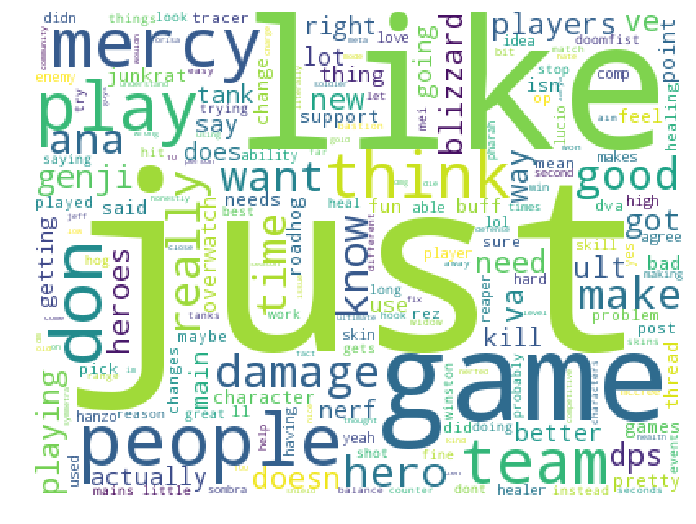

In [474]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()